In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.5 MB/s eta 0:00:00


In [2]:
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="RnVwPCB8UgjXPHrFvLlO")

# Access the project and version you want to download
project = rf.workspace("spyrobot").project("fire-smoke-and-human-detector-2")
version = project.version(1)

# Download the dataset in YOLOv9 format
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Smoke-and-Human-Detector-2-1 in yolov9:: 100%|██████████| 19510/19510 [00:02<00:00, 8036.59it/s] 


In [3]:
# Define a function to write text to a file
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)


text="""
names:
- fire
- human
- smoke

nc: 3


test: /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images
train: /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/train/images
val: /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/valid/images

"""

write_text_to_file(text, "output.yaml")

In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()


Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [5]:
!yolo task=detect  mode=train data=/kaggle/working/output.yaml model=yolov9c.yaml epochs=30 imgsz=640 batch=16

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.yaml, data=/kaggle/working/output.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

In [ ]:
fghjhjktfghdghfsdhhsdkhfdfuwgudfcdgwqqfeufdvghdvgwgfvdghwvsdghfdgqfdccsdgcaufuwf

In [6]:
from IPython.display import Image, display


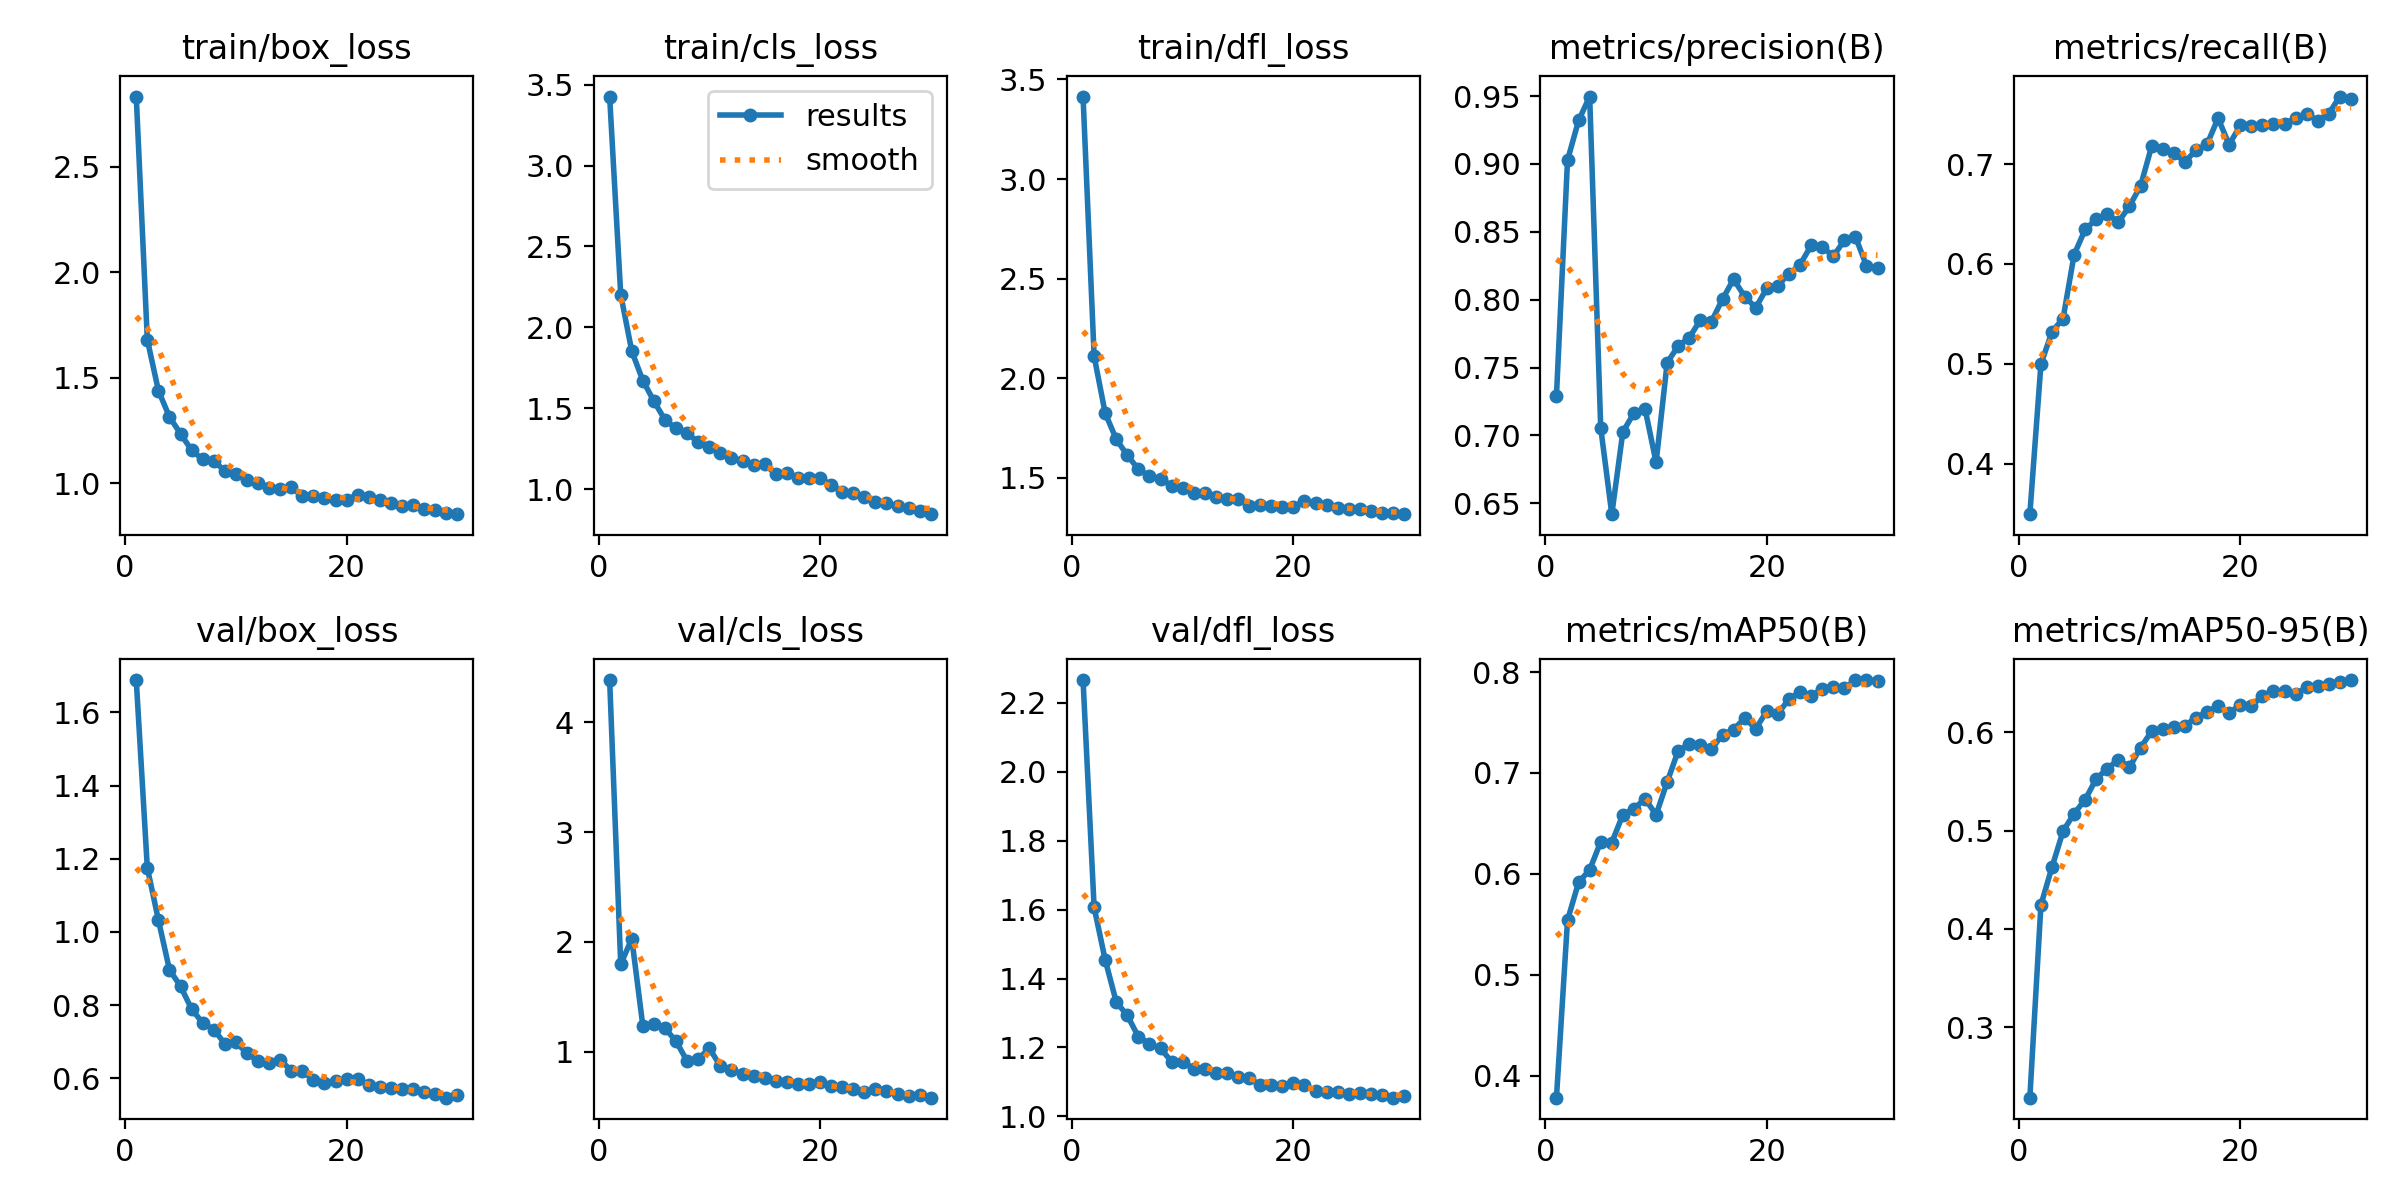

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

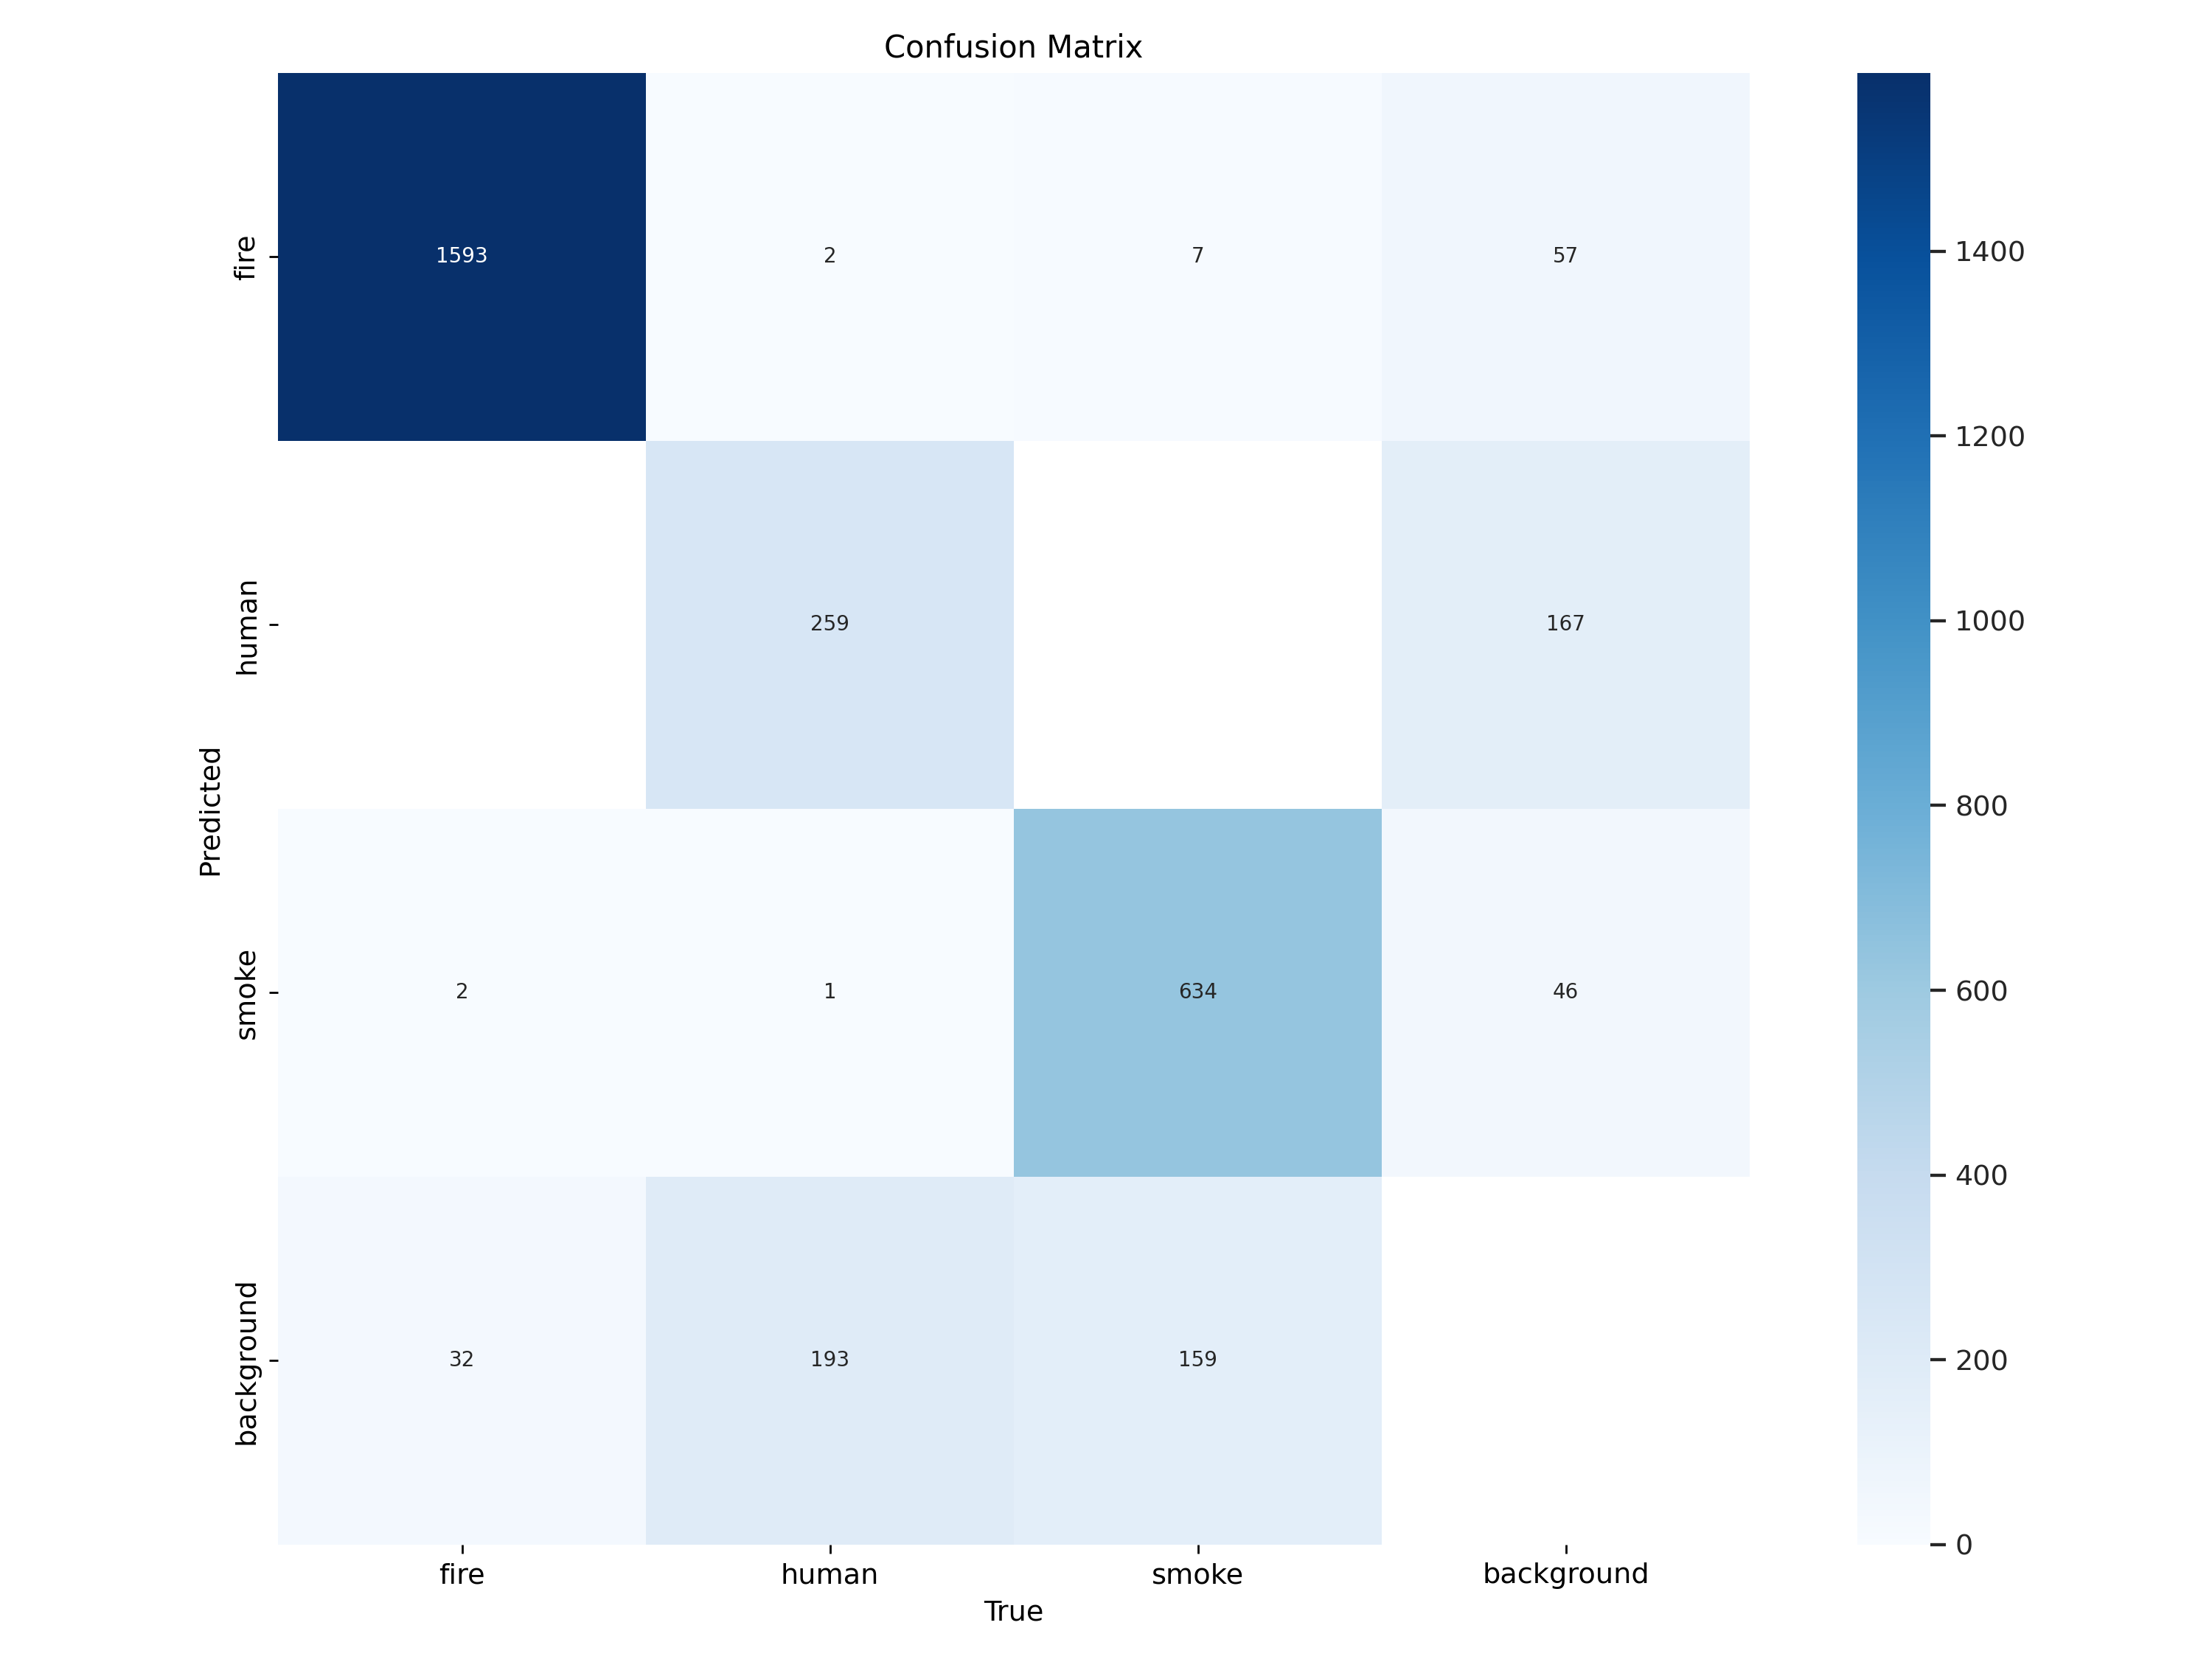

In [8]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images

Ultralytics 8.3.38 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv9c summary (fused): 384 layers, 25,321,561 parameters, 0 gradients, 102.3 GFLOPs

image 1/731 /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images/WEB09226_jpg.rf.7c03ff86a120461861e522c814a27e7b.jpg: 640x640 1 human, 1 smoke, 21.8ms
image 2/731 /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images/WEB09253_jpg.rf.e4b99690a5f4a5b580c07cfc5a5cd38b.jpg: 640x640 (no detections), 21.7ms
image 3/731 /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images/WEB09254_jpg.rf.24cf6f32a7d283be417903b614f1bc51.jpg: 640x640 (no detections), 21.7ms
image 4/731 /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images/WEB09261_jpg.rf.9eda8bb076d3abc25d03a5e0c155ec59.jpg: 640x640 (no detections), 21.8ms
image 5/731 /kaggle/working/Fire-Smoke-and-Human-Detector-2-1/test/images/WEB09262_jpg.rf.1e75f1a96d0fa79bc23a33ad606881ae.jpg: 640x640 1 smoke, 21.8ms
image 6/731 /kaggle/working/Fire

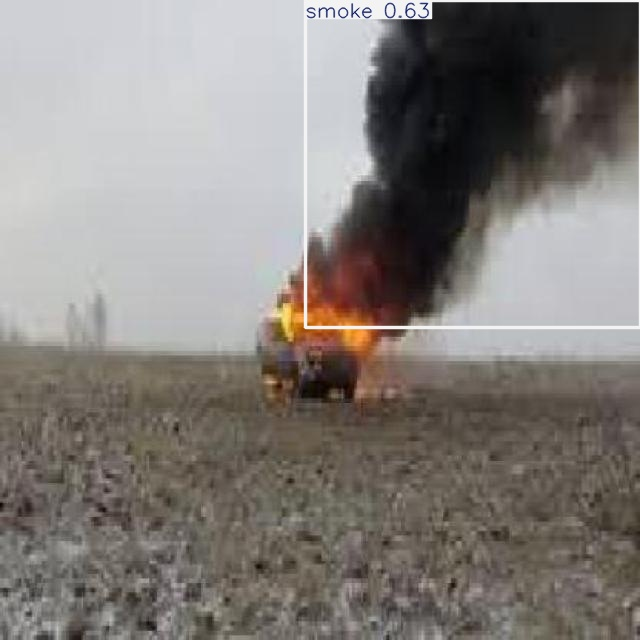

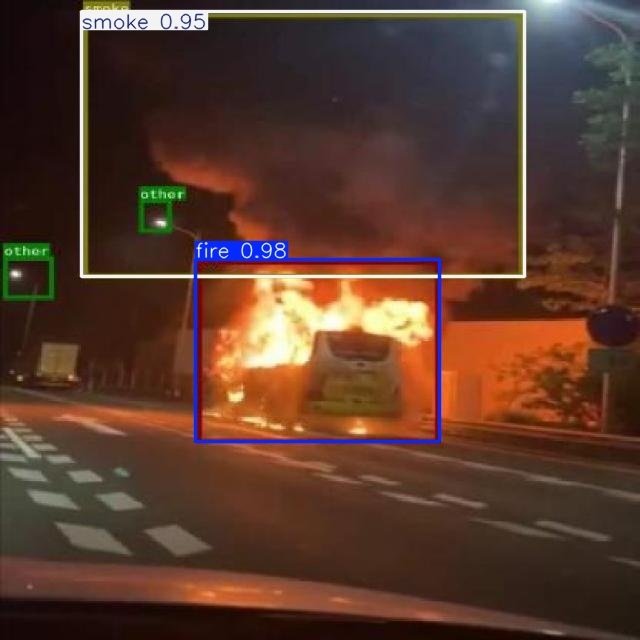

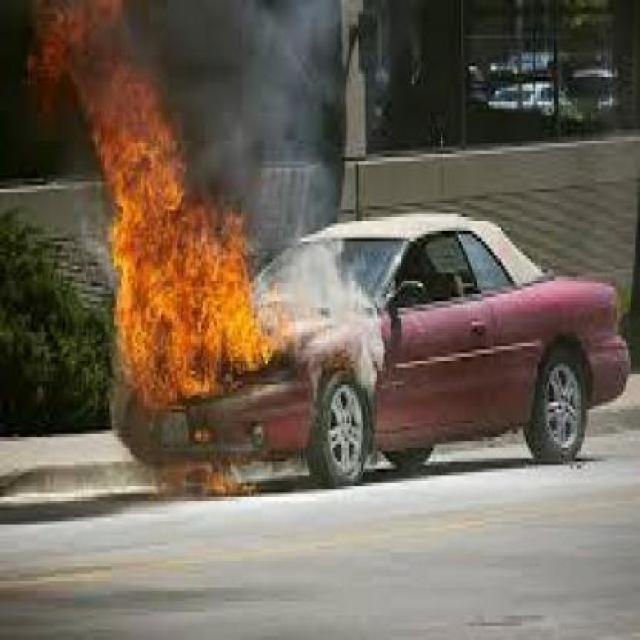

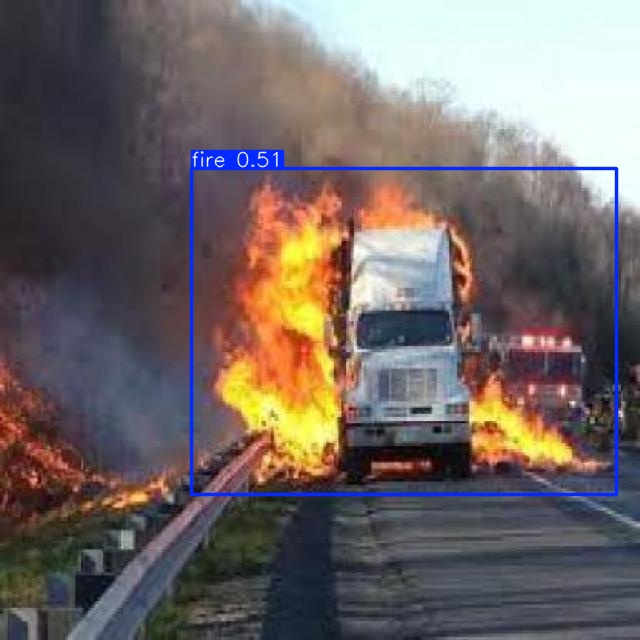

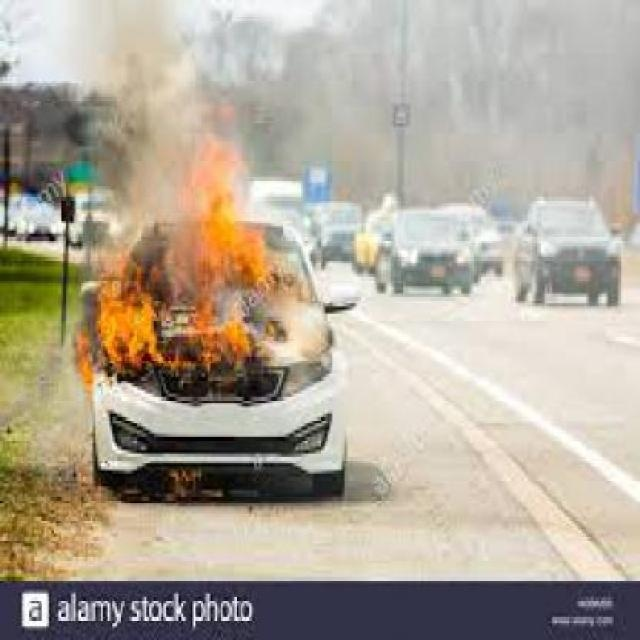

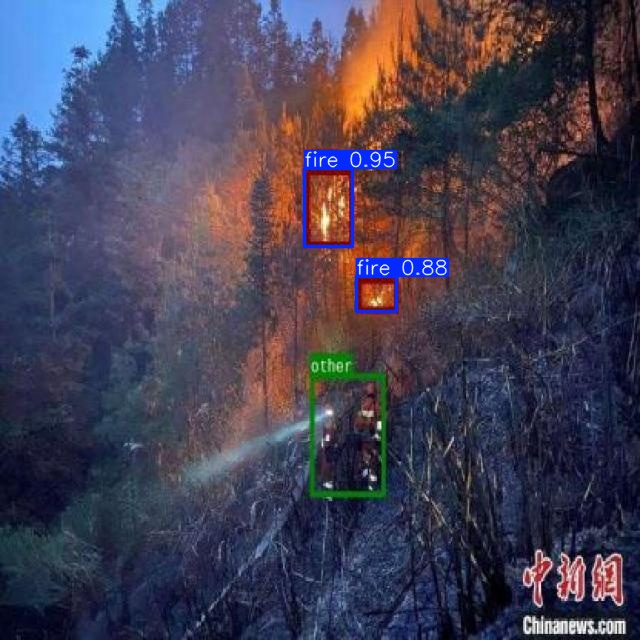

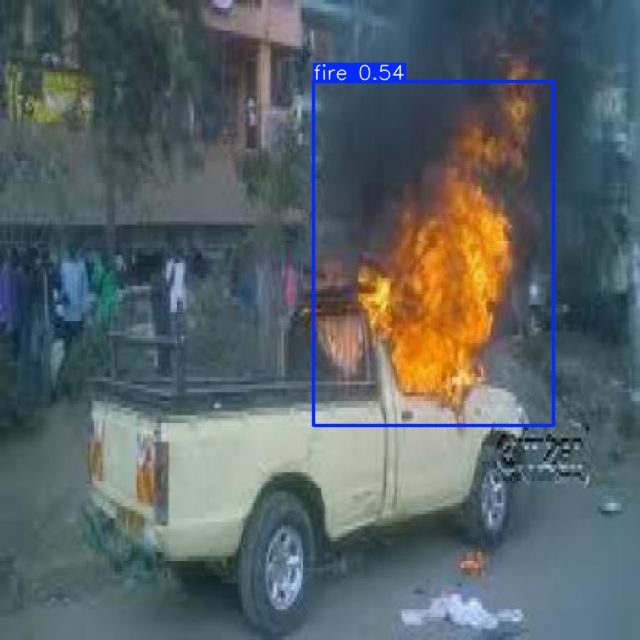

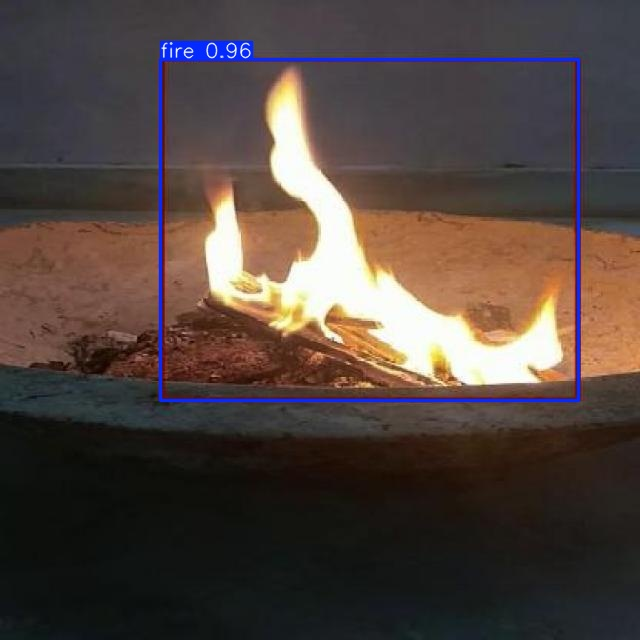

In [10]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display


for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg")[2:10] :#assuming JPG
    print("\n")
    display(Image(filename=imageName))